<h1 style="text-align:center"> Simple Data Analysis Code  </h1>

<p>First we'll import two libraries to read and manipulate tabular array data</p>
<ul>
    <li> <code>numpy</code> will serve as a library for array manipulation and linear algebra operations
    <li> <code>pandas</code> will serve as a library for tabular reading and data analysis
</ul>

In [90]:
import numpy as np
import pandas as pd

<ul>
<li> <code>read_csv</code> is pretty self-explainatory.
<li> <code>replace</code> will swap a value of a given type, for another and it will be done within the same variable as specified by <code>inplace</code>. In this case we are replacing the <var>"?"</var> (which appears here when there are fields where no data was given) for <var>"NaN"</var> (not a number) which is a special value of a numeric data type.
<li> <code>astype</code> will change data type of the specified fields, in this example, we are changing the <var>age</var> and <var>fare</var> fields to a numpy float 64 bits data type.
</ul>

In this case we are using a dataset about the survivality of the victims of the Titanic.

In [91]:
data = pd.read_csv("titanic3.csv")
data.replace('?', np.nan, inplace = True)
data = data.astype({"age":np.float64, "fare":np.float64})

Here we'll use two libraries for plotting data, in this case <code>matplotlib</code> serves as the base library for plotting the given set of data, and <code>seaborn</code> is used as a more elegant way of creating different kinds of plots (including some basic analysis, such as kde, and probability distributions) in this example the violin plot is extensively used. its arguments are.
<ul>
    <li> <code> x:</code> x axis data:
    <li> <code> y:</code> y axis data:
    <li> <code> hue:</code> color coding
    <li> <code> data:</code> <code>pandas</code> dataframe from where the data is plotted. (this can be a series, dict, array or list of arrays)
    <li> <code> ax:</code> the axes of the subplot where it will be plotted.
</ul>

<Axes: xlabel='survived', ylabel='fare'>

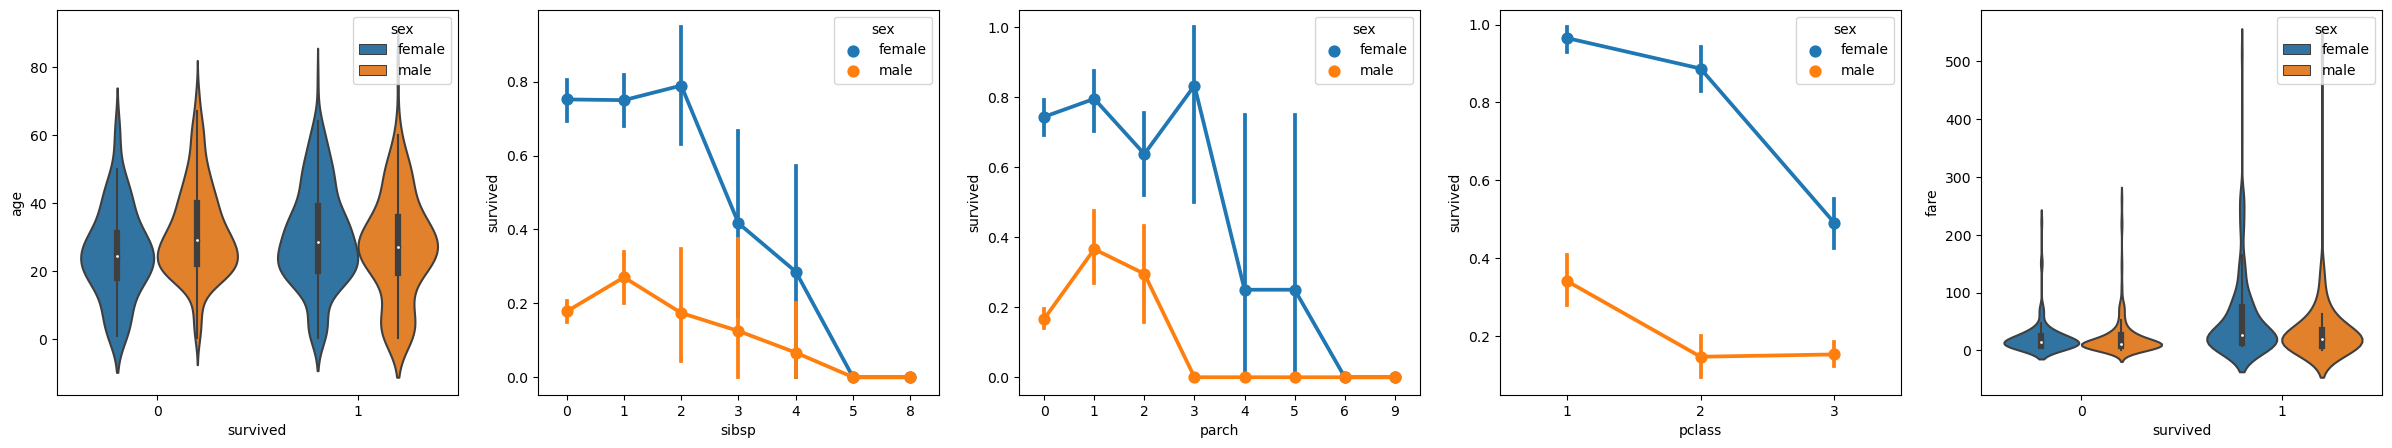

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols = 5, figsize = (30, 5))

sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

Now we are going to try a correlation between some of the variables, for this we need to replace the <var>male</var> and <var>female</var> data types to numeric ones, same as before, <code>inplace</code> will be used so everything is modified in the same variable.

Then we calculate correlation, by default this method uses the <code>pearson</code> correlation which is given by:

$$ r_{x,y} = \frac{\sum_{i = 1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_{i = 1}^{n}(x_i - \bar x)^{2}}\sqrt{\sum_{i = 1}^{n}(y_i - \bar y)^{2}}} $$

This will use each one of the fields in the data frame and will find the correlation with the <var> survived </var> field.

In [93]:
data.replace({'male':1, 'female':0}, inplace=True)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


Now we'll do an analysis based on two variables <code>sibsp</code> Siblings or Spouse and <code>parch</code> parents or childs. 
For this, we'll create a new field called <code>relatives</code>, for this we will use the fields mentioned before, if the person has any of those fields it will yield a 1 which means that person had relatives within the ship.

In [94]:

data['relatives'] = data.apply(lambda row: int ((row['sibsp'] + row['parch'] ) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


Since the <code>survived</code> field is more significant that <code>sibsp</code> and <code>parch</code> we'll drop these two.
(or what its the same, we'll keep the other fields rather than those two).

Additionally <code>dropna</code> will remove the empty cells that are left in the DataFrame.

In [95]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

<h2> Train and Evaluate Model </h2>


Now the idea is to create a model that can predict if a person with a given set of conditions could have survived the titanic.

We'll leverage the <code>scikit-learn</code> library, a widely-used open-source tool for various machine learning tasks in Python. To facilitate cross-validation, we'll import the <code>train_test_split</code> function. This step involves partitioning the dataset into training and testing sets, ensuring robust model evaluation.

In this case we are using the following input arguments
<ul>
<li> First arguments* are the <code>arrays</code> to be used, this can be <var>lists</var>, <var>numpy arrays</var>, <var> scipy-sparse matrix </var>, or <var> pandas Data-Frames </var>
<li> Then we are specifying the amount of samples to use in the test split of the data set with <code>test_size</code> since we are providing a <var>float</var> data type, we are specifying a proportion of the data, in other words we are using 20% of the data for the test split.
<li> <code>random_state</code> will do a shuffle of the data before the split, a fixed <var>int</var> value will do the same shuffle always, so we can keep the results reproducible. 
</ul>

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

Since we used two arrays, we will get four outputs, two for each one.
we can check their sizes to check the data split.

In [97]:
print("Data frame size:",data[['sex', 'pclass', 'age', 'relatives', 'fare']].size)
print("x_train size:", x_train.size)
print("x_test size:", x_test.size)

Data frame size: 5225
x_train size: 4180
x_test size: 1045


Now we will standarize all the values in the train and test splits using the <code>StandardScaler</code> from the scikit learning library.
Keep in mind that this process aims to adjust the data so its mean is $0$ and its variance is $1$, this is done so all the data is within the same range of values and is comparable.

$$ {x}_{scaled} = \frac{x-mean}{std} $$

<ul>
<li> The <code> StandardScaler </code> standarizes removing the mean and scaling to unit variance.
<li> <code>fit_transform</code> will fit the data (calculating mean and standard deviation) then will apply the transform procedure shown in the equation.
<li> <code>transform</code> will use the same values of mean and standard deviation calculated before (so there is no bias in how the data is treated), then applies the previously explained procedure.
</ul>

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Now we'll train the model using the data, for the model training we will use the Naive Bayes method.
keep in mind that the y_train variable is 

In [99]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Now we will predict the output data.

In [100]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885
